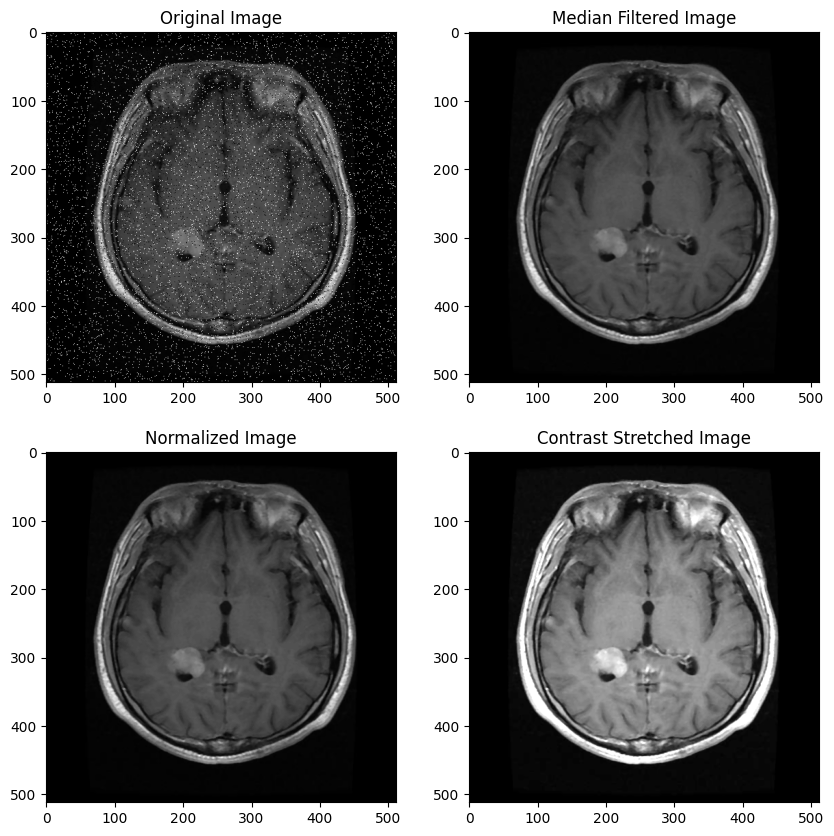

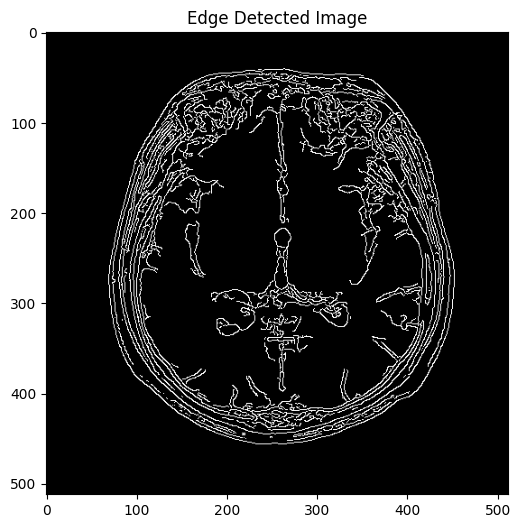

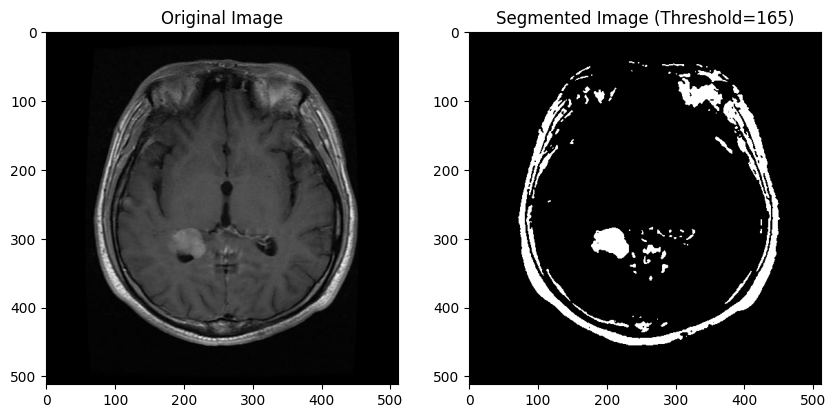

In [22]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2

def normalise(image):
    data=np.array(image)
    max=np.max(data)
    min=np.min(data)
    row=len(data)
    col=len(data[0])
    for i in range (row):
        for j in range(col):
            x=data[i,j]
            data[i,j]=(x-min)*255/(max-min)
    image2=Image.fromarray(data)
  
    return image2

def contrast_stretching(image, low_percentile=2, high_percentile=98):
    """
    Apply contrast stretching to an input image and return the updated image.

    Parameters:
    - image: Input image (PIL Image)
    - low_percentile: Lower percentile for contrast stretching (default: 2)
    - high_percentile: Higher percentile for contrast stretching (default: 98)

    Returns:
    - Stretched image
    """
    # Convert image to numpy array
    image_data = np.array(image)

    # Calculate low and high values based on percentiles
    low_value = np.percentile(image_data, low_percentile)
    high_value = np.percentile(image_data, high_percentile)

    # Apply contrast stretching
    stretched_image_data = (image_data - low_value) * (255.0 / (high_value - low_value))
    
    # Clip values to the [0, 255] range
    stretched_image_data = np.clip(stretched_image_data, 0, 255)

    # Convert the numpy array back to a PIL Image
    stretched_image = Image.fromarray(stretched_image_data.astype(np.uint8))

    return stretched_image


def add_salt_and_pepper(image, salt_prob, pepper_prob):
    """
    Add salt and pepper distortion to an image.

    Parameters:
    - image: Input image (PIL Image).
    - salt_prob: Probability of adding salt distortion.
    - pepper_prob: Probability of adding pepper distortion.

    Returns:
    - Image with added salt and pepper distortion.
    """
    # Convert image to numpy array
    image_data = np.array(image)

    # Add salt distortion
    salt_mask = np.random.rand(*image_data.shape) < salt_prob
    image_data[salt_mask] = 255

    # Add pepper distortion
    pepper_mask = np.random.rand(*image_data.shape) < pepper_prob
    image_data[pepper_mask] = 0

    # Convert the numpy array back to a PIL Image
    distorted_image = Image.fromarray(image_data.astype(np.uint8))

    return distorted_image

# Example usage:
#image = plt.imread('Images/Tumor/05.jpg')
image = plt.imread('Images/Tumor/07.jpg')
#image = plt.imread('Images/Healthy/h3.jpg')
#image = plt.imread('Images/Healthy/h6.jpg')
#image = plt.imread('Images/Healthy/h5.jpg')

# Convert the image to grayscale (if it's a color image)
if image.ndim == 3:
    image = np.mean(image, axis=-1)
    


 # Add salt and pepper distortion to the stretched image
salt_prob = 0.03 # Adjust the probability as needed
pepper_prob = 0.03  # Adjust the probability as needed
distorted_image = add_salt_and_pepper(image, salt_prob, pepper_prob)



# Apply median filtering using OpenCV
median_filtered_image = Image.fromarray(cv2.medianBlur(image.astype(np.uint8), 3))

# Apply normalization to the median-filtered image
normalized_image = normalise(median_filtered_image)

# Apply contrast stretching to the normalized image
stretched_image = contrast_stretching(normalized_image)


plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(distorted_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(np.array(median_filtered_image), cmap='gray')
plt.title('Median Filtered Image')

plt.subplot(2, 2, 3)
plt.imshow(np.array(normalized_image), cmap='gray')
plt.title('Normalized Image')

plt.subplot(2, 2, 4)
plt.imshow(np.array(stretched_image), cmap='gray')
plt.title('Contrast Stretched Image')

plt.show()

# Convert the contrast-stretched image to numpy array for edge detection
stretched_array = np.array(stretched_image)

# Apply edge detection to the contrast-stretched image using Canny method
edge_detected_array = cv2.Canny(stretched_array, 50, 150)
edge_detected_image = Image.fromarray(edge_detected_array)

# Display the edge-detected image
plt.figure(figsize=(6,6))
plt.imshow(np.array(edge_detected_image), cmap='gray')
plt.title('Edge Detected Image')
plt.show()

# Convert the edge-detected image to numpy array for segmentation
edge_detected_array = np.array(edge_detected_image)

# Apply segmentation
threshold_value =165 # Adjust the threshold value as needed
segmented_array = (stretched_array > threshold_value).astype(np.uint8) * 255
segmented_image = Image.fromarray(segmented_array)

# Display the original and segmented images
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(np.array(image), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(np.array(segmented_image), cmap='gray')
plt.title('Segmented Image (Threshold={})'.format(threshold_value))

plt.show()
